In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
csv_file = "../build/timing.csv"


In [22]:
# Plot a particular step
def plot_step(csv_file, column='Average', tag='', step=-1, op='mean'):
    # Read
    data = pd.read_csv(csv_file)
    
    if (step >= 0):
        data = data[data['Step'] == step]
    
    if (tag != ''):
        data = data[data['Tag'] == tag]
    
    #print(data)
    
    data = data.groupby(['Key','Tag'], as_index=False)
    if (op == 'mean'):
        data = data.mean()
    elif (op == 'max'):
        data = data.max()
        
    data['label'] = data['Tag'] + '-' + data['Key']

    plt.bar(data['label'], data[column])

    plt.ylabel(column + ' time (in milliseconds)')

    # plot value at end of each bar
    for i, v in enumerate(data[column]):
        plt.text(i, v, str(v))
    
    title = column + ' timings across newton iterations'
    if (step >= 0):
        title += ' for timestep ' + str(step)
    else:
        if (op == 'mean'):
            title += ' averaged'
        elif (op == 'max'):
            title += ' max'
        title += ' over all timesteps '
    plt.title(title)
    plt.xticks(rotation=90)
    plt.savefig(tag + 'bar.eps', format='eps')
    plt.show()

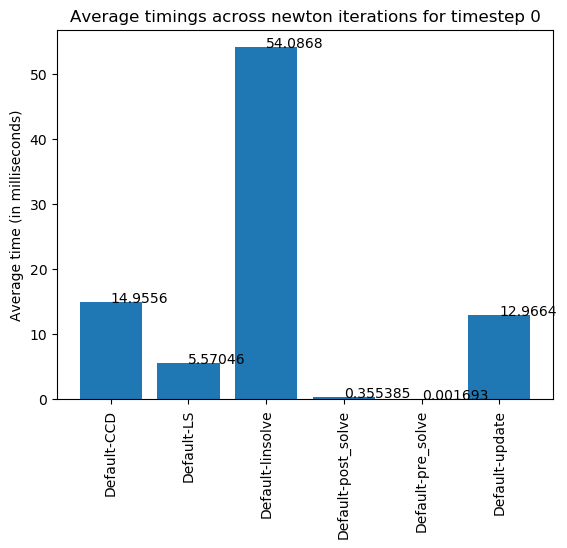

In [23]:
plot_step(csv_file, step=0, column='Average', tag='Default')

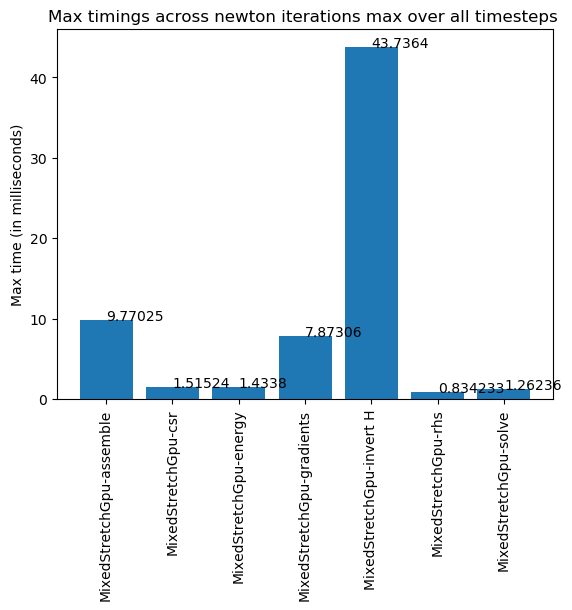

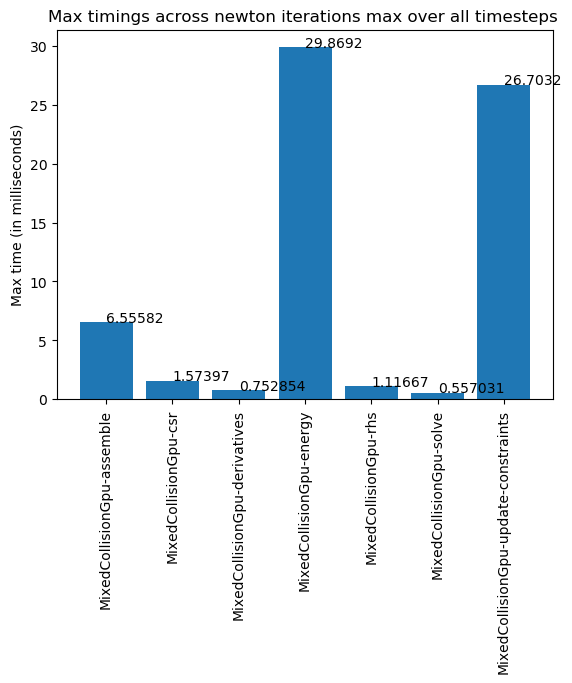

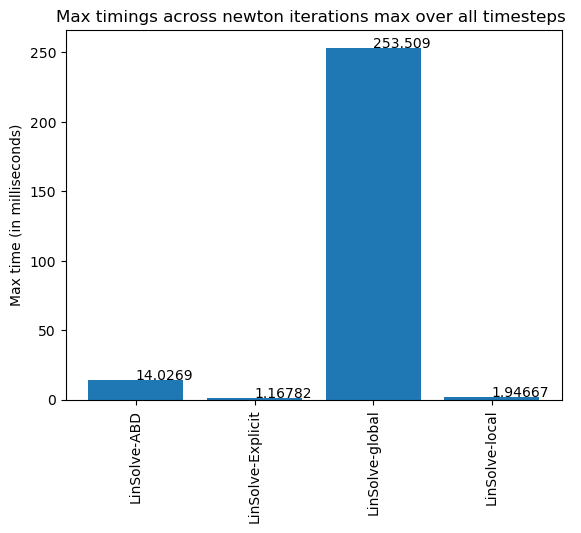

In [24]:
csv_file = "../output/timing/shiba_timing.csv"
csv_file = "../build/timing.csv"
plot_step(csv_file, step=-1, column='Max', tag='MixedStretchGpu',op='max')
plot_step(csv_file, step=-1, column='Max', tag='MixedCollisionGpu',op='max')
plot_step(csv_file, step=-1, column='Max', tag='LinSolve',op='max')

In [14]:
# For a given CSV file, compute the average time for each key for a given
# tag. Compute these values for each timestep and plot them in a stacked
# bar chart.
def plot_data(csv_file, column='Average', tag='Default'):
    
    # Read
    data = pd.read_csv(csv_file)

    # Get number of steps in the data
    steps = data['Step'].max() + 1
    
    if (tag != ''):
        data = data[data['Tag'] == tag]
    
    # merge "post_solve" and "pre_solve" keys by summing their values for each step
    name1 = "pre_solve"
    name2 = "post_solve"

    data.loc[data['Key'] == name1, 'Average'] += data.loc[data['Key'] == name2, 'Average'].to_numpy()
    data.loc[data['Key'] == name1, 'Total'] += data.loc[data['Key'] == name2, 'Total'].to_numpy()
    data.loc[data['Key'] == name1, 'Max'] += data.loc[data['Key'] == name2, 'Max'].to_numpy()

    # remove name2
    data = data[data['Key'] != name2]
    data = data[data['Key'] != name1]
    

    # Add a label for each key
    data['label'] = data['Tag'] + '-' + data['Key']

    # Group by label
    data = data.groupby(['label'], as_index=False)

    # draw stackplot where x = steps, y = column, and each line is a key
    x = np.arange(steps)
    x = x[1:] # Remove first step to account for warmin up the cache
    y = []
    labels = []
    for key, group in data:
        yi = group[column].to_numpy()
        y.append(yi[1:])
        print(y[-1].shape)
        labels.append(key)
 
    plt.stackplot(x, y, labels=labels)
    plt.legend(loc='upper right')
    plt.savefig('stackplot.eps', format='eps')
    plt.show()

/tmp/ipykernel_7589/1302800830.py:39: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in data:
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(219,)
(219,)
(219,)
(219,)


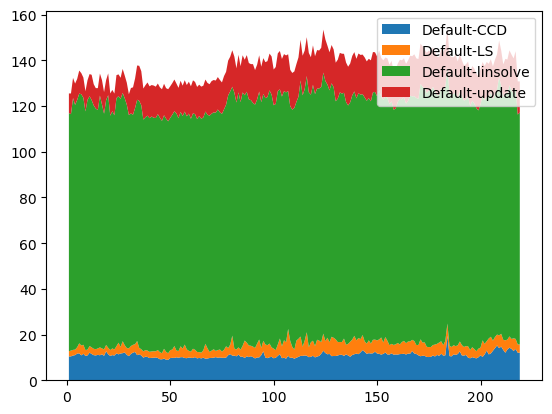

In [25]:
csv_file = "../output/timing/roller_timing.csv"
#csv_file = "../build/timing.csv"
plot_data(csv_file, column='Average', tag='Default')